In [1]:
pip install convokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.2/183.2 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.4 MB/s eta 0:00:00
  Created wheel for convokit: filename=convokit-3.0.0-py3-none-any.whl size=216707 sha256=3eb3178b73c6c19dc060090ef3aa65230c6cee6542224aa8d195d27ff99836c2
  Stored in directory: /root/.cache/pip/wheels/c4/89/8c/2677fdb888588b6f93cb6ac86bdfb020f1f1

In [2]:
!unzip politics_usa.corpus.zip -d politics_usa.corpus

Archive:  politics_usa.corpus.zip
  inflating: politics_usa.corpus/users.json  
  inflating: politics_usa.corpus/conversations.json  
  inflating: politics_usa.corpus/corpus.json  
  inflating: politics_usa.corpus/index.json  
  inflating: politics_usa.corpus/utterances.jsonl  


In [3]:
try:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  %matplotlib inline
  import seaborn as sns
  from convokit import Corpus
  from convokit.text_processing import TextProcessor, TextCleaner, TextParser
  from convokit.convokitPipeline import ConvokitPipeline
except ImportError as e:
  print(e)

In [4]:
import convokit
corpus = convokit.Corpus(filename="/content/politics_usa.corpus")

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
default_backend: mem


In [5]:
corpus.print_summary_stats()

Number of Speakers: 303
Number of Utterances: 543
Number of Conversations: 338


In [6]:
conv_df = corpus.get_conversations_dataframe().drop(["vectors"], axis=1)
utt_df = corpus.get_utterances_dataframe().drop(["vectors"], axis=1)

In [7]:
utt_df.shape

(543, 14)

In [8]:
utt_df["text"].value_counts()

text
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [9]:
!pip install emot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.7 MB/s eta 0:00:00


In [10]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 4.8 MB/s eta 0:00:00


In [11]:
! pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [12]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=aee9b5ee1864bd4fe7a64faba938beae28c096a8759993823ff61b9079aa343d
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [13]:
# Check for version consistency of Corpus
try:
    from collections import Counter, defaultdict
    import re
    import os
    import json
    import string

    # Import third-party libraries
    import pandas as pd

    import warnings
    warnings.filterwarnings('ignore')

    import numpy as np
    from collections import defaultdict
    from tqdm import tqdm
    from convokit import Corpus, Speaker, Utterance, download
    import convokit
    from convokit.text_processing import TextProcessor, TextCleaner, TextParser
    from convokit.convokitPipeline import ConvokitPipeline
    from convokit import PolitenessStrategies
    from textblob import TextBlob as tb
    import nltk
    from nltk.stem import WordNetLemmatizer
    import spacy
    import emot
    import contractions as cm
    import vaderSentiment
    from googleapiclient import discovery
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


    ### Import langdetect and set seed = 0 to enforce consistent results
    from langdetect import DetectorFactory, detect
    DetectorFactory.seed = 0

    # The below modules can be implemented after the utterances have been loaded as Pandas Dataframe or Numpy arrays
    # import sklearn
    # from sklearn.preprocessing import FunctionTransformer
    # from sklearn.base import BaseEstimator, TransformerMixin
    # from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union
    # from sklearn.compose import ColumnTransformer, make_column_transformer

except ImportError as e:
  print(e)

In [14]:
# NLTK libraries and dependencies for preprocessing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [15]:
# Convokit requires a SpaCy model to be installed. Run `python -m spacy download MODEL_NAME`
! python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 7.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
# Load the spacy language model
# A custom language model can be loaded. Check
spacy.load("en_core_web_md")

In [17]:
lemmatizer = WordNetLemmatizer() # Installing WordNet Lemmatizer
sentiment =  SentimentIntensityAnalyzer()  # Intialize Vader Sentiment Analyzer
emotion = emot.core.emot()  # Initialize Emoji Object
politeness = PolitenessStrategies() # Politeness Indicators
spacy_nlp = spacy.load('en_core_web_md', disable=['ner']) # Spacy Language Model

In [18]:
# Load the Reddit Corpus
try:
    corpus = convokit.Corpus(filename="/content/politics_usa.corpus")
except Exception as e:
    print(e)

In [19]:
def def_value():
    return 0

In [20]:
subjectivity_clues = []

with open("/content/subjectivity_clues.txt", "r+") as file:
    for line in file.readlines():
        values = line.split(" ")[2]
        subjectivity_clue = values.split("=")[1]
        subjectivity_clues.append(subjectivity_clue)

In [21]:
def extractHashtags(utterance: str) -> list:
    """ Returns all Twitter hashtags from a tweet

    Store all hashtags from a tweet and store them in a separate column
    """
    hashtags_ls = re.findall("#\w+", utterance)
    return hashtags_ls

hashtags = TextProcessor(proc_fn=extractHashtags, output_field="hashtags")  # We pass the required function as a parameter to TextProcessor class. The output would be stored in metadata as "hashtags"

def extractUsernameTags(utterance: str) -> list:
    """ Returns all Username tags from a tweet
    Store all tags from a tweet and store them in a separate column
    """

    username_tags = re.findall("@\w+", utterance)
    return username_tags

reply_to_usernames = TextProcessor(proc_fn=extractUsernameTags, output_field="username_tags") # Output is tsored in metadata as "username_tags"


def cleanReddit(
        text_reddit, newline=True, quote=True,
        bullet_point=True, dates=True, link=True,
        strikethrough=True, spoiler=True, heading=True,
        emoj=True, emoticon=True, condensed=True):
    # Newlines we don't need - only
    """ Cleans reddit utterances"""

    if newline:
        text_reddit = re.sub(r'\n+', ' ', text_reddit)
        # Remove the many " " that we replaced in the last step
        text_reddit = text_reddit.strip()
        text_reddit = re.sub(r'\s\s+', ' ', text_reddit)

    # > are for the quoted texts from the main comment or the reply
    if quote:
        text_reddit = re.sub(r'>', '', text_reddit)

    # Bullet points/asterisk are used for markdown like - bold/italic - Could create trouble in parsing? idk
    if bullet_point:
        text_reddit = re.sub(r'\*', '', text_reddit)
        text_reddit = re.sub('&amp;#x200B;', '', text_reddit)

    # []() Link format then we remove both the tag/placeholder and the link
    if link:
        text_reddit = re.sub(r"http\S+", '', text_reddit)
        text_reddit = re.sub(r'\[.*?\]\(.*?\)', '', text_reddit)

    # Strikethrough
    if strikethrough:
        text_reddit = re.sub('~', '', text_reddit)

    # Spoiler, which is used with < less-than (Preserves the text)
    if spoiler:
        text_reddit = re.sub('&lt;', '', text_reddit)
        text_reddit = re.sub(r'!(.*?)!', r'\1', text_reddit)

    # Heading to be removed as there are these markdown style features in reddit too
    if heading:
        text_reddit = re.sub('#', '', text_reddit)

    if emoj:
        # Implement the emoji scheme here
        # Implementing a Naive Emoji Scheme
        # Some associated libraries are EMOT and DEMOJI
        # text_reddit = emoji.demojize(text_reddit).replace(":", "").replace("_", "")
        # Makes more sense for the node feature but might as well import that function here if ready
        pass

    if dates:
        text_reddit = re.sub(r'(\d+/\d+/\d+)', '', text_reddit)

    if emoticon:
        # Implement the emoticon scheme here.
        # Makes more sense for the node feature but might as well import that function here if ready
        pass

    # Needs to be the last step in the process
    # if contractions:
    # text = contractions.fix(text)
    # print("Running")
    return text_reddit

clean_text_reddit = TextCleaner(text_cleaner = cleanReddit, replace_text = False, save_original = True)

def cleanTwitter(
        text_twitter, urls=True, tags=True,
        newLine=True, ellipsis=True, ampersand=True,
        tilde=True, special_chars=True, dollar=True,
        commas_semicols=True, bracketed_phrases=True, contractions=True,
        quotation_marks=True, greater_than_less_than=True, question_mark_exclaim=True,
        character_encodings=True, trademark=True, condensed=True) -> str:
    """ Clean tweets after extracting all hashtags and username tags
    Not comprehensive enough to capture all idiosyncrasies, but works for most of the time
    """
    if urls:
        url_pattern = "https?:\/\/(www\.)?(\w+)(\.\w+)\/\w*"
        text_twitter = re.sub(url_pattern, "", text_twitter)

    if tags:
        text_twitter = re.sub("@\w+", "", text_twitter)

    # Remove "\n". One or more occurrences
    if newLine:
        # Replacing single occurrences of '\n' with ''
        # Replacing multiple occurrences, i.e., >=2 occurrences with '.'
        text_twitter = re.sub("\n", "", text_twitter)
        text_twitter = re.sub("\n\n", ".", text_twitter)
        text_twitter = text_twitter.strip()

    # Fix contractions
    if condensed:
        text_twitter = cm.fix(text_twitter)
        text_twitter = re.sub("\s\s", "", text_twitter)

    # Remove "ellipsis"
    if ellipsis:
        text_twitter = re.sub("\.{2,}", "", text_twitter)

    # Replace "&" with "and"
    if ampersand:
        text_twitter = text_twitter.replace("&amp", "")

    # Replace "~" with "about"
    if tilde:
        text_twitter = re.sub("~", "about", text_twitter)

    # Remove the special_chars list: [%, ^, *, -, _, +, =, |, \, /, ?]
    if special_chars:
        spec_char_list = ['%', '^', '*', '-', '_', '+', '=', '|', '/', '?']
        sent = ""
        new_sent_tokens = []

        for character in text_twitter:
            if str(character) not in spec_char_list:
                new_sent_tokens.append(character)

        sent = sent.join(new_sent_tokens)
        sent = sent.strip()
        text_twitter = sent

    # Rename $ as dollar
    # if dollar:
    #     text_twitter = re.sub("$", "dollar", text_twitter)

    # Remove brackets and any text enclosed within simple brackets, usually used for acronyms
    if bracketed_phrases:
        text_twitter = re.sub("\(\w+\)", "", text_twitter)

    # If single quotes or double quotes have been used in tweets, encash their meaning for the time being. Don't include any other information
    if quotation_marks:
        text_twitter = re.sub("(\'|\")[a-zA-Z0-9\s+\.]*(\'|\")", "", text_twitter)

    # For the time being, replace commas by "" and semicolons by "."
    if commas_semicols:
        text_twitter = re.sub("\,+", "", text_twitter)
        text_twitter = re.sub("\;+", ".", text_twitter)

    # Resolve '>' and '<'
    # Replace these characters with their respective names
#     if greater_than_less_than:
#         text_twitter = re.sub("<", "is less than", text_twitter)
#         text_twitter = re.sub(">", "is greater than", text_twitter)
#         text_twitter = re.sub("<=", "is less than or equal to", text_twitter)
#         text_twitter = re.sub(">=", "is greater than or equal to", text_twitter)

    # For the time being, replace and interjections with a full stop
    if question_mark_exclaim:
        text_twitter = re.sub("(\?|\!)+", ".", text_twitter)

    # Resolve character encodings
    if character_encodings:
        text_twitter = re.sub("â|€|¦|â|€˜|€™", "", text_twitter)

    # Remove trademark symbol
    if trademark:
        text_twitter = re.sub("\u2122", "", text_twitter)

    return text_twitter

clean_text_twitter = TextCleaner(text_cleaner = cleanTwitter, replace_text = False, save_original = True)

def convert_to_lower(utt: str) -> str:
    """ This function block performs twitter text normalization

        For instance, the different forms of 'hate' are: Hate, HATE, haTE, etc. This function would convert all such occurences to a single canonical form
        """
    exclude_tags_list = ['NN', 'NNS', 'NNP', 'NNPS']  # Check if the attached POS tags are correct or not
    sents = nltk.sent_tokenize(utt)
    modified_sent_ls = []

    for sent in sents:
        modified_token_ls = []
        words = nltk.word_tokenize(sent)  # Tokenize the sentence and extract POS tags

        words = [lemmatizer.lemmatize(word) for word in words]  # Perform lemmatization if required
        word_pos_tags = nltk.pos_tag(words)

        for (word, tag) in word_pos_tags:
            if tag not in exclude_tags_list or word != "I":
                word = word.lower()
                modified_token_ls.append(word)

        modified_token_ls[0] = modified_token_ls[0].capitalize()

        utt = " ".join(modified_token_ls)
        utt = utt.strip()
        modified_sent_ls.append(sent)

    final_text = " ".join(modified_sent_ls)

    return final_text

lowercase_text = TextProcessor(proc_fn = convert_to_lower, output_field = "lowercase_text")

# Use a combination of IDENTITY ATTACK and INSULT parameters to separate MICROAGGRESSIONS from OTHER HATE-SPEECH forms

def modifier_count(utt: str) -> int:   # Calculating less of something isn't always the best indicator. Instead the prevalence of something more than ususal is a better marker. # Optional - Emergency Toolkit
    """Count modifiers, i.e., adjectives and adverbs in an utterance
    Practically every sentence has modifiers. This function doesn't act as a filter. It is intended to be applied to the entire dataframe
    The function block can detect probable deceptive clues in tweets and reddit posts
    Less usage of descriptive modifiers is a possible clue that the speaker is uncertain in his claims/opinions.
    This function is more of an emergency toolkit
    """

    adj_pos_tags = ['JJ', 'JJR', 'JJS']  # POS tags describing adjectives
    adv_pos_tags = ['RB', 'RBR', 'RBS']  # POS tags for adverbs
    words = nltk.word_tokenize(utt)
    word_tag_lst = nltk.pos_tag(words)
    mod_count_dict = defaultdict(def_value)
    count_mod_tags = 0
    for (word, tag) in word_tag_lst:
        if tag in adj_pos_tags or tag in adv_pos_tags:
            count_mod_tags += 1
            mod_count_dict[word] += 1

    return {"modifier_count_dict": mod_count_dict, "count_mod_tags": count_mod_tags}

modifier_count = TextProcessor(proc_fn = modifier_count, input_field = "lowercase_text", output_field = "modifier_count")

def hedge_count(utt: str) -> int:
    """ Count the list of all modal verbs that indicate possibility, but not certainty
    The function block can detect probable deceptive clues in tweets and reddit posts
    More usage of uncertain modal verbs is a possible clue that the speaker is uncertain in his utterance
    """
    count_hedges, hedge_count_dict = 0, defaultdict(def_value)
    set_of_hedges_en = ["almost", "apparent", "apparently", "appear", "appeared", "appears", "approximately", "argue",
                        "argued", "argues", "around", "assume", "assumed", "broadly", "certain amount",
                        "certain extent", "certain level", "claim", "claimed", "claims", "doubt", "doubtful",
                        "essentially", "estimate", "estimated", "fairly", "feel", "feels", "felt", "frequently",
                        "from my perspective",
                        "from our perspective", "from this perspective", "generally", "guess", "in general",
                        "in most cases", "in most instances", "in my opinion", "in my view", "in our opinion",
                        "in our view",
                        "in this view", "indicate", "indicated", "indicates", "largely", "likely", "mainly", "may",
                        "maybe", "might", "mostly", "often", "on the whole", "ought", "perhaps", "plausible",
                        "plausibly", "possible",
                        "possibly", "postulate", "postulated", "postulates", "presumable", "presumably", "probable",
                        "probably", "quite", "rather", "relatively", "roughly", "seems", "should", "sometimes",
                        "somewhat", "suggest",
                        "suggested", "suggests", "suppose", "supposed", "supposes", "suspect", "suspects", "tend to",
                        "tended to", "tends to", "think", "thinking", "thought", "to my knowledge", "typical",
                        "typically", "uncertain",
                        "uncertainly", "unclear", "unclearly", "unlikely",
                        "usually"]  # The Hedge word list has been taken from "https://github.com/tslmy/politeness-estimator.git"

    pos_modal_ls = ["shall", "should", "can", "could", "will", "would", "may", "must",
                    "might"]  # List of 9 modal verbs indicating possibility

    hedges_modals = set_of_hedges_en + pos_modal_ls

    words = utt.lower().split(" ")
    for word in words:
        if word in hedges_modals:
            count_hedges += 1
            hedge_count_dict[word] += 1

    return {"hedge_count_dict": hedge_count_dict, "count_hedges": count_hedges}

hedge_modals = TextProcessor(proc_fn = hedge_count, input_field="lowercase_text",
                             output_field="hedge_count")

def group_ref_count(utt: str) -> int: # Include all third-party pronouns as well
    """Count list of group references
    Usage of more self-references along with subjectivity score is a possible indication of deception
    """
    count_group_ref, group_ref_count_dict = 0, defaultdict(def_value)
    words = utt.lower().split()
    group_ref = ["we", "our", "ours", "ourselves", "us", "they", "them", "thesmselves", "their", "theirs",
                 "everyone", "everybody"]  # More of it to be included here. Self-referencing pronouns

    for word in words:
        if word in group_ref:
            count_group_ref += 1
            group_ref_count_dict[word] += 1

    return {"group_ref_count_dict": group_ref_count_dict, "count_group_ref": count_group_ref}

group_ref_count = TextProcessor(proc_fn = group_ref_count, input_field = "lowercase_text", output_field = "groupRef_count")

def subjectivity_utterance(utterance: str) -> int:

    """ Textblob subjectivity score
    A higher subjective score indicates personal opinion.
    Low subjective scores could be a possible indicator of deception. To be used along with self references.
    """

    subjective_lexicon_count = 0
    subjective_lexicon_dict = defaultdict(def_value)
    subjectivity_scores = []
    sents = nltk.sent_tokenize(utterance)

    if not sents:
        return {
            "avg_subjectivity_score": 0,
            "subjective_lexicon_count": 0,
            "subjective_lexicon_dict": {}
        }

    for sent in sents:
      subjectivity_scores.append(tb(sent).sentiment.subjectivity)
      words = sent.lower().split()

      for word in words:
        if word in subjectivity_clues:
          subjective_lexicon_dict[word] += 1
          subjective_lexicon_count += 1

    if not subjectivity_scores:
        avg_subjectivity_score = 0
    else:
        avg_subjectivity_score = round((sum(subjectivity_scores) / len(subjectivity_scores)), 3)
    subjective_details = {
                            "avg_subjectivity_score": avg_subjectivity_score,
                            "subjective_lexicon_count": subjective_lexicon_count,
                            "subjective_lexicon_dict": subjective_lexicon_dict
                         }
    return subjective_details

subjectivity = TextProcessor(proc_fn = subjectivity_utterance, input_field = "lowercase_text", output_field = "subjectivity_score")


In [22]:
pipe_reddit = ConvokitPipeline ([
                    # ("clean reddit text", clean_text_reddit), - To be done later
                    ("convert to lowercase", lowercase_text),
                    ("count modifiers", modifier_count),
                    ("count hedges and modals", hedge_modals),
                    ("count group references", group_ref_count),
                    ("subjectivity score", subjectivity)
])

In [23]:
try:
    # Transform the reddit corpus
    transformed_corpus_reddit = pipe_reddit.transform(corpus, verbosity = 50)
except Exception as e:
    print(e)
else:
    print("Congratulations, the reddit corpus has been transformed")

Congratulations, the reddit corpus has been transformed


In [24]:
try:
    corpus.dump(os.path.basename(OUT_DIR), base_path=os.path.dirname(OUT_DIR),
            fields_to_skip={'utterance': ['parsed','tagged','clean_text']})    # Just random field names

except:
    print("NO OUTPUT DIRECTORY")

NO OUTPUT DIRECTORY


In [25]:
try:
    CORPUS_NAME = "politics_usa"
    OUTPUT_DIR = "/content"
    transformed_corpus_reddit.dump(CORPUS_NAME, base_path=OUTPUT_DIR)

except:
    print("NO OUTPUT DIRECTORY")

In [26]:
 transformed_corpus_reddit.random_utterance()

Utterance({'obj_type': 'utterance', 'vectors': [], 'speaker_': Speaker({'obj_type': 'speaker', 'vectors': [], 'owner': <convokit.model.corpus.Corpus object at 0x78aa48bb6860>, 'id': '[deleted]', 'meta': ConvoKitMeta({})}), 'owner': <convokit.model.corpus.Corpus object at 0x78aa48bb6860>, 'id': 'dphme3h', 'meta': ConvoKitMeta({'score': 1, 'top_level_comment': 'dphme3h', 'retrieved_on': 1512401805, 'gilded': 0, 'gildings': None, 'subreddit': 'politics_usa', 'stickied': False, 'permalink': '/r/politics_usa/comments/79sutd/facebook_russianbacked_election_content_reached/dphme3h/', 'author_flair_text': '', 'lowercase_text': '[deleted]', 'modifier_count': {'modifier_count_dict': defaultdict(<function def_value at 0x78aa3e9efac0>, {'[': 1}), 'count_mod_tags': 1}, 'hedge_count': {'hedge_count_dict': defaultdict(<function def_value at 0x78aa3e9efac0>, {}), 'count_hedges': 0}, 'groupRef_count': {'group_ref_count_dict': defaultdict(<function def_value at 0x78aa3e9efac0>, {}), 'count_group_ref': 0

Analysis

In [27]:
try:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  %matplotlib inline
  import seaborn as sns
  from convokit import Corpus
  from convokit.text_processing import TextProcessor, TextCleaner, TextParser
  from convokit.convokitPipeline import ConvokitPipeline
except ImportError as e:
  print(e)

In [36]:
corpus = Corpus("/content/politics_usa")

In [37]:
conv_df = corpus.get_conversations_dataframe().drop(["vectors"], axis=1)
utt_df = corpus.get_utterances_dataframe().drop(["vectors"], axis=1)

In [38]:
utt_df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,meta.subreddit,meta.stickied,meta.permalink,meta.author_flair_text,meta.lowercase_text,meta.modifier_count,meta.hedge_count,meta.groupRef_count,meta.subjectivity_score
id,,,,,,,,,,,,,,,,,,,
8oj9nl,1528134288,,Tman654,None,8oj9nl,2,None,1536333445,0,None,politics_usa,False,/r/politics_usa/comments/8oj9nl/unemployment_i...,,,"{'modifier_count_dict': {}, 'count_mod_tags': 0}","{'hedge_count_dict': {}, 'count_hedges': 0}","{'group_ref_count_dict': {}, 'count_group_ref'...","{'avg_subjectivity_score': 0, 'subjective_lexi..."
8r8q40,1529042805,[deleted],[deleted],None,8r8q40,1,None,1536379250,0,None,politics_usa,False,/r/politics_usa/comments/8r8q40/volunteering/,,[deleted],"{'modifier_count_dict': {'[': 1}, 'count_mod_t...","{'hedge_count_dict': {}, 'count_hedges': 0}","{'group_ref_count_dict': {}, 'count_group_ref'...","{'avg_subjectivity_score': 0.0, 'subjective_le..."
8rf1yi,1529102600,,canadasean,None,8rf1yi,2,None,1536382206,0,None,politics_usa,False,/r/politics_usa/comments/8rf1yi/we_have_seen_t...,,,"{'modifier_count_dict': {}, 'count_mod_tags': 0}","{'hedge_count_dict': {}, 'count_hedges': 0}","{'group_ref_count_dict': {}, 'count_group_ref'...","{'avg_subjectivity_score': 0, 'subjective_lexi..."
8rgv89,1529121077,,Paleo87,None,8rgv89,1,None,1536383042,0,None,politics_usa,False,/r/politics_usa/comments/8rgv89/big_russ_and_m...,,,"{'modifier_count_dict': {}, 'count_mod_tags': 0}","{'hedge_count_dict': {}, 'count_hedges': 0}","{'group_ref_count_dict': {}, 'count_group_ref'...","{'avg_subjectivity_score': 0, 'subjective_lexi..."
8u35kj,1530043153,Dems are the party of death...ripping babies f...,3workingmen,None,8u35kj,0,None,1536448406,0,None,politics_usa,False,/r/politics_usa/comments/8u35kj/ripping_babies...,,Dems are the party of death...ripping babies f...,"{'modifier_count_dict': {'expectant': 1, '.......","{'hedge_count_dict': {}, 'count_hedges': 0}","{'group_ref_count_dict': {}, 'count_group_ref'...","{'avg_subjectivity_score': 0.0, 'subjective_le..."


In [39]:
utt_df["count_modifiers"] = utt_df["meta.modifier_count"].apply(lambda modifier_dict: modifier_dict["count_mod_tags"])
utt_df["count_hedges"] = utt_df["meta.hedge_count"].apply(lambda hedge_dict: hedge_dict["count_hedges"])
utt_df["groupRef_count"] = utt_df["meta.groupRef_count"].apply(lambda groupRef_dict: groupRef_dict["count_group_ref"])
utt_df["subjectivity_score"] = utt_df["meta.subjectivity_score"].apply(lambda subjectivity_dict: subjectivity_dict["subjective_lexicon_count"])

In [32]:
utt_df.head()

,timestamp,text,speaker,reply_to,conversation_id,meta.score,meta.top_level_comment,meta.retrieved_on,meta.gilded,meta.gildings,...,meta.author_flair_text,meta.lowercase_text,meta.modifier_count,meta.hedge_count,meta.groupRef_count,meta.subjectivity_score,count_modifiers,count_hedges,groupRef_count,subjectivity_score
id,,,,,,,,,,,,,,,,,,,,,
8oj9nl,1528134288,,Tman654,None,8oj9nl,2,None,1536333445,0,None,...,,,"{'modifier_count_dict': {}, 'count_mod_tags': 0}","{'hedge_count_dict': {}, 'count_hedges': 0}","{'group_ref_count_dict': {}, 'count_group_ref'...","{'avg_subjectivity_score': 0, 'subjective_lexi...",0,0,0,0
8r8q40,1529042805,[deleted],[deleted],None,8r8q40,1,None,1536379250,0,None,...,,[deleted],"{'modifier_count_dict': {'[': 1}, 'count_mod_t...","{'hedge_count_dict': {}, 'count_hedges': 0}","{'group_ref_count_dict': {}, 'count_group_ref'...","{'avg_subjectivity_score': 0.0, 'subjective_le...",1,0,0,0
8rf1yi,1529102600,,canadasean,None,8rf1yi,2,None,1536382206,0,None,...,,,"{'modifier_count_dict': {}, 'count_mod_tags': 0}","{'hedge_count_dict': {}, 'count_hedges': 0}","{'group_ref_count_dict': {}, 'count_group_ref'...","{'avg_subjectivity_score': 0, 'subjective_lexi...",0,0,0,0
8rgv89,1529121077,,Paleo87,None,8rgv89,1,None,1536383042,0,None,...,,,"{'modifier_count_dict': {}, 'count_mod_tags': 0}","{'hedge_count_dict': {}, 'count_hedges': 0}","{'group_ref_count_dict': {}, 'count_group_ref'...","{'avg_subjectivity_score': 0, 'subjective_lexi...",0,0,0,0
8u35kj,1530043153,Dems are the party of death...ripping babies f...,3workingmen,None,8u35kj,0,None,1536448406,0,None,...,,Dems are the party of death...ripping babies f...,"{'modifier_count_dict': {'expectant': 1, '.......","{'hedge_count_dict': {}, 'count_hedges': 0}","{'group_ref_count_dict': {}, 'count_group_ref'...","{'avg_subjectivity_score': 0.0, 'subjective_le...",4,0,0,1


In [33]:
utt_df.rename(
               columns = {
                            "lowercase_text": "meta.lowercase_text",
                            "modifier_count": "meta.modifier_count",
                            "hedge_count": "meta.hedge_count",
                            "groupRef_count": "meta.groupRef_count",
                            "subjectivity_score": "meta.subjectivity_score",
               }, inplace=True
)
# utt_df.drop("vectors", axis=1, inplace=True)

<Axes: xlabel='count_hedges', ylabel='subjectivity_score'>

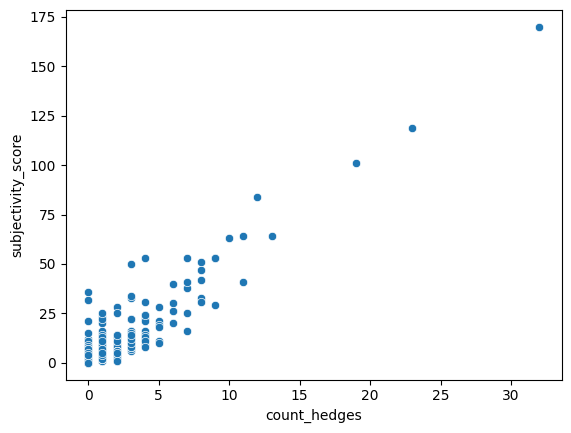

In [40]:
sns.scatterplot(x=utt_df["count_hedges"], y=utt_df["subjectivity_score"])

<Axes: xlabel='count_modifiers', ylabel='subjectivity_score'>

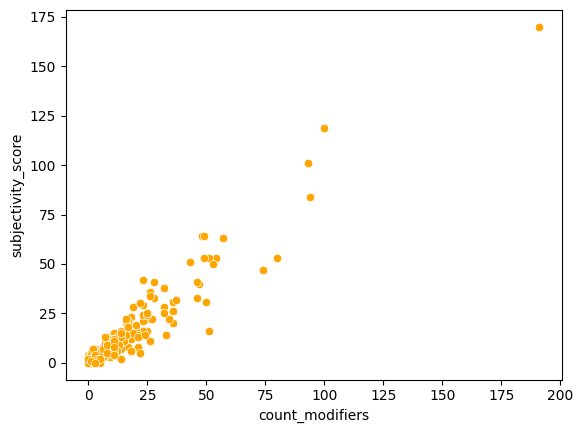

In [42]:
sns.scatterplot(x=utt_df["count_modifiers"], y=utt_df["subjectivity_score"],color='orange')

<Axes: xlabel='groupRef_count', ylabel='subjectivity_score'>

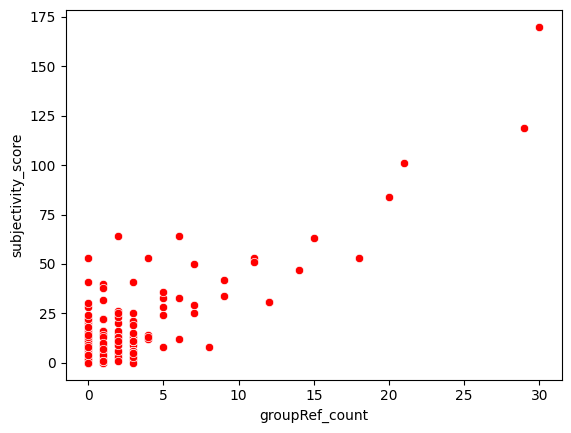

In [43]:
sns.scatterplot(x=utt_df["groupRef_count"], y=utt_df["subjectivity_score"], color="red")